# **1. PyTorch Basic**
- Reference의 예제 코드에서 내용 선정 및 발췌 후 정리 및 수정, 보완함
- Reference
  - 파이토치 첫걸음(제이펍) 예제코드

## 1-1. 기본 모듈 임포트

In [ ]:
import numpy as np
import torch

## 1-2. GPU 설정하기

In [ ]:
# torch.cuda.is_available()를 통해 현재 시스템의 상태를 인식, 지정하면 GPU또는 CPU를 상황에 맞게 적용할 수 있다.
# device='cuda' 또는 device='cuda:0'와 같은 방법으로 직접 지정할 수 있다. (0: GPU의 Index)

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


## 1-3. 기본 데이터형(텐서) 사용하기

In [ ]:
# 중첩 list를 지정
t = torch.tensor([[1, 2], [3, 4.]])
print(t)

# device를 지정하면 GPU로 Tensor를 만들 수 있다
t = torch.tensor([[1, 2], [3, 4.]], device='cuda')
print(t)

# dtype을 사용해 데이터형을 지정해 Tensor를 만들 수 있다
t = torch.tensor([[1, 2], [3, 4.]], dtype=torch.float64)
print(t)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [ ]:
# 0부터 9까지의 수치로 초기화된 1차원 Tensor
t = torch.arange(0, 10)
print(t)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
#모든 값이 0인 100 x 10 의 Tensor를 작성해서 to메서드로 GPU에 전송
if DEVICE == 'cuda':
  t = torch.zeros(100, 10).to("cuda:0")
else:
  t = torch.zeros(100, 10)

print(t)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [ ]:
# 정규 난수로 100 x 10의 Tensor를 작성
t = torch.randn(100, 10)
print(t)

tensor([[ 8.6555e-01, -3.6890e-01, -2.1366e-01,  7.0938e-01, -1.6366e+00,
         -8.0220e-01, -9.0089e-01,  4.4153e-02,  1.2223e+00, -2.6459e-02],
        [ 7.4267e-01,  1.1665e+00, -7.9725e-02,  1.8050e+00, -3.4916e-01,
         -1.6497e+00, -5.7115e-01, -7.9976e-01, -9.1215e-01,  8.6209e-01],
        [-9.0733e-02,  6.3963e-01,  6.4720e-01,  1.1429e+00,  1.2382e+00,
          9.1053e-01,  6.4362e-01,  5.5856e-01,  1.2795e-01,  9.6027e-01],
        [-6.8851e-01, -2.9021e-01,  8.5780e-01,  1.3044e-01,  1.4572e+00,
         -4.2293e-01,  1.3423e+00, -5.9471e-01, -1.6688e+00,  2.5468e+00],
        [-1.1661e+00, -1.9481e+00,  2.1732e+00,  9.8666e-01, -1.4153e+00,
          1.1468e+00,  1.4796e-01,  2.0442e-01, -2.6686e-01,  7.3526e-01],
        [ 1.0506e+00, -7.9669e-01,  9.1563e-01, -3.1918e-01,  1.0565e+00,
         -2.2312e-01, -2.9232e-01,  1.4489e+00, -2.1463e-01,  1.3540e+00],
        [-6.3101e-01,  3.5462e-02, -1.1620e-01, -5.5555e-02,  5.2346e-01,
         -7.5902e-01, -6.1000e-0

In [ ]:
# Tensor의 shape은 size 메서드로 취득 가능
t.size()

torch.Size([100, 10])

In [ ]:
# numpy 메서드를 사용해 ndarray로 변환
t = torch.tensor([[1, 2], [3, 4.]])
x = t.numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [ ]:
# GPU上상의 Tensor는 cpu메서드로,
# CPU의 Tensor로 이동(변환)할 필요가 있다
t = torch.tensor([[1, 2], [3, 4.]], device="cuda:0")
x = t.to("cpu").numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [ ]:
t = torch.tensor([[1,2,3], [4,5,6.]])

# 스칼라 첨자 지정
print(t[0, 2])

# 슬라이스로 지정
print(t[:, :2])

# 리스트로 지정
print(t[:, [1,2]])

# 마스크 배열을 시용해서 3보다 큰 부분만 선택
print(t[t > 3])

tensor(3.)
tensor([[1., 2.],
        [4., 5.]])
tensor([[2., 3.],
        [5., 6.]])
tensor([4., 5., 6.])


In [ ]:
# [0, 1]의 요소를 100으로 설정
t[0, 1] = 100
print(t)

# 슬라이스를 사용한 일괄 대입
t[:, 1] = 200
print(t)      

# 마스크 배열을 사용해서 특정 조건의 요소만 치환
t[t > 10] = 20
print(t)

tensor([[  1., 100.,   3.],
        [  4.,   5.,   6.]])
tensor([[  1., 200.,   3.],
        [  4., 200.,   6.]])
tensor([[ 1., 20.,  3.],
        [ 4., 20.,  6.]])


In [ ]:
# 길이 3인 벡터
v = torch.tensor([1, 2, 3.])
w = torch.tensor([0, 10, 20.])
print('v=', v)
print('w=', w)
print('----------------------------------------------')

# 2 × 3의 행렬
m = torch.tensor([[0, 1, 2], [100, 200, 300.]])
print('m=', m)
print('----------------------------------------------')

# 벡터와 스칼라의 덧셈
v2 = v + 10
print('v2=', v2)

# 자승도 같은 방식
v2 = v ** 2
print('v2=', v2)

# 동일 길이의 벡터 간 뺄쎔
z = v - w
print('z=', z)

# 여러 가지 조합
u = 2 * v - w / 10 + 6.0
print('u=', u)
print('----------------------------------------------')

# 행렬과 스칼라
m2 = m * 2.0
print('m2=', m2)
# 행렬과 벡터
#(2, 3)인 행렬과 (3,)인 벡터이므로 브로드 캐스트가 작동
m3 = m + v
print('m3=', m3)
# 행렬 간 처리
m4 = m + m
print('m4=', m4)
print('----------------------------------------------')


v= tensor([1., 2., 3.])
w= tensor([ 0., 10., 20.])
----------------------------------------------
m= tensor([[  0.,   1.,   2.],
        [100., 200., 300.]])
----------------------------------------------
v2= tensor([11., 12., 13.])
v2= tensor([1., 4., 9.])
z= tensor([  1.,  -8., -17.])
u= tensor([ 8.,  9., 10.])
----------------------------------------------
m2= tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])
m3= tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])
m4= tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])
----------------------------------------------


In [ ]:
# 100 × 10의 테스트 데이터 생성
X = torch.randn(100, 10)
print(X)
print("X=", X)
print('----------------------------------------------')

# 수학 함수를 포함하는 수식
y = X * 2 + torch.abs(X)
print("y=", y)
print('----------------------------------------------')

# 평균치 구하기
m = torch.mean(X)
print('m=', m)
print('----------------------------------------------')

# 함수가 아닌 메서드로도 사용할 수 있다
m = X.mean()
print('m=', m)
print('----------------------------------------------')

# 집계 결과는 0차원의 Tensor로 item 메서드를 사용해서
# 값을 추출할 수 있다
m_value = m.item()
print('m_value=', m_value)
print('----------------------------------------------')

# 집계는 차원을 지정할 수도 있다. 다음은 행 방향으로 집계해서,
# 열 단위로 평균값을 계산한다
m2 = X.mean(0)
print('m2=', m2)
print('----------------------------------------------')

tensor([[ 7.2740e-01, -3.8103e-01,  1.2323e+00, -1.1125e+00,  2.1223e+00,
         -1.3010e-01,  6.7068e-01, -1.3980e+00, -1.0099e+00,  1.0266e+00],
        [-9.5045e-01, -8.8284e-01, -5.7023e-01, -1.9411e-01, -1.0194e+00,
          1.3391e+00,  2.4549e-01,  1.2038e+00, -1.9821e+00,  1.5756e+00],
        [ 7.2997e-01, -1.4685e+00,  1.1435e+00,  3.0743e-02,  1.5007e-01,
         -3.2701e-01,  8.8925e-01, -6.1868e-01,  8.1744e-01, -8.9386e-01],
        [-1.6616e-01,  2.6470e-01, -5.7589e-01, -9.3633e-02,  2.0412e-01,
          4.8116e-01,  1.3502e+00,  1.4168e-02, -5.8506e-01,  8.3771e-02],
        [-1.5080e+00,  8.5749e-01,  3.5203e-01,  2.0523e-02,  7.1616e-02,
          8.6854e-01, -7.5782e-01, -3.3792e-01, -1.2370e-01,  1.1776e-01],
        [-1.0945e+00,  1.5161e+00,  4.7950e-01,  1.1408e+00, -4.9308e-01,
         -8.8945e-01,  2.6782e-01,  1.2887e-02,  2.6184e-01, -1.8108e-01],
        [ 9.6294e-01,  8.5145e-01,  6.1148e-02,  1.3839e+00, -3.1436e-01,
         -3.6988e-02,  1.0890e+0

In [ ]:
x1 = torch.tensor([[1, 2], [3, 4.]]) # 2×2
x2 = torch.tensor([[10, 20, 30], [40, 50, 60.]]) # 2×3

# 2×2를 4×1로 보여준다
print(x1)
print(x1.view(4, 1))
print('----------------------------------------------')

# -1는 나머지 차원을 나타내며 한 번만 사용할 수 있다
# 아래 예에선 -1을 사용하면 자동으로 4가 된다
print(x1.view(1, -1))
print('----------------------------------------------')

# 2×3을 전치해서 3×2로 만든다
print(x2.t())
print('----------------------------------------------')

# dim=1로 결합하면 2×5의 Tensor를 만든다
torch.cat([x1, x2], dim=1)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [2.],
        [3.],
        [4.]])
----------------------------------------------
tensor([[1., 2., 3., 4.]])
----------------------------------------------
tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])
----------------------------------------------


tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])

In [ ]:
# HWC을 CHW로 변환
# 64×32×3의 데이터가 100개
hwc_img_data = torch.rand(100, 64, 32, 3)
print(hwc_img_data)
print('----------------------------------------------')
chw_img_data = hwc_img_data.transpose(1, 2).transpose(1, 3)
print(chw_img_data)

tensor([[[[0.9386, 0.6928, 0.2036],
          [0.4252, 0.8514, 0.6969],
          [0.2262, 0.9862, 0.2277],
          ...,
          [0.9729, 0.6879, 0.8890],
          [0.9282, 0.7060, 0.2665],
          [0.8524, 0.7196, 0.7911]],

         [[0.5145, 0.9374, 0.7375],
          [0.1740, 0.4102, 0.9781],
          [0.7680, 0.3525, 0.7704],
          ...,
          [0.7925, 0.9159, 0.5762],
          [0.5030, 0.0587, 0.0870],
          [0.2088, 0.6539, 0.6863]],

         [[0.7030, 0.0865, 0.0950],
          [0.3045, 0.1143, 0.3443],
          [0.7457, 0.7399, 0.0631],
          ...,
          [0.6490, 0.7909, 0.4203],
          [0.7200, 0.7260, 0.8807],
          [0.4349, 0.6349, 0.2114]],

         ...,

         [[0.4933, 0.3054, 0.8483],
          [0.9276, 0.5396, 0.0068],
          [0.4761, 0.3920, 0.5244],
          ...,
          [0.8612, 0.3420, 0.4676],
          [0.9269, 0.9637, 0.8151],
          [0.4017, 0.3011, 0.9267]],

         [[0.3883, 0.2479, 0.1802],
          [0.4151

In [ ]:
m = torch.randn(100, 10)
v = torch.randn(10)
print('m = ', m)
print('v = ', v)

# 내적
d = torch.dot(v, v)
print('d = v·v = ', d)
print('----------------------------------------------')

# 100 × 10의 행렬과 길이 10인 벡터의 곱
# 결과는 길이 100인 벡터
v2 = torch.mv(m, v)
print('v2 = ', v2)
print('----------------------------------------------')

# 행렬곱
m2 = torch.mm(m.t(), m)
print('m2 = ', m2)
print('----------------------------------------------')

# 특이값 분해
u, s, v = torch.svd(m)
print('u = ', u)
print('s = ', s)
print('v = ', v)


m =  tensor([[-1.8975e+00, -1.9829e-01,  1.7223e+00, -5.9035e-01, -7.9090e-01,
          9.6803e-01,  7.8567e-01, -9.1638e-01, -6.6621e-01,  1.3701e+00],
        [ 7.3698e-01, -9.6452e-01, -7.9830e-01, -6.4053e-01,  4.5054e-01,
          3.3361e-01, -1.0393e+00,  7.9701e-01,  1.1382e+00, -2.8283e-01],
        [ 7.0440e-01,  2.2059e-01, -1.1641e+00,  3.9181e-01, -4.3692e-01,
         -1.3592e+00, -7.4545e-01,  2.6004e-01,  1.2281e+00, -2.7179e-01],
        [ 6.0318e-01,  9.1800e-01, -1.9984e+00,  2.1174e+00, -5.7983e-02,
          2.4330e+00,  9.8353e-01, -3.3079e-01, -5.6090e-01,  3.6205e-01],
        [-1.6317e-01, -1.1889e+00, -1.0354e+00,  1.9805e-01, -3.0998e-01,
         -2.0922e-01,  6.7133e-02,  3.9162e-01,  4.5566e-01,  9.6058e-01],
        [ 1.5980e+00,  4.6639e-02,  1.0597e-01,  1.2514e+00,  4.1908e-01,
          3.3722e-01,  6.4257e-01, -1.0691e+00,  1.4748e+00, -4.1095e-01],
        [ 2.8581e-01, -1.0620e+00, -4.0479e-01,  7.1568e-02,  7.4310e-01,
         -9.4992e-01, -1.11

In [ ]:
x = torch.randn(100, 3)
print('x = ', x)
print('----------------------------------------------')

# 미분의 변수로 사용하는 경우는 requires_grad를 True로 설정
a = torch.tensor([1, 2, 3.], requires_grad=True)
print('a = ', a)
print('----------------------------------------------')

# 계산을 통해 자동으로 계산 그래프가 구축된다
y = torch.mv(x, a)
o = y.sum()
print('o = ', o)
print('----------------------------------------------')

# 미분을 실행
o.backward()

# 분석 답과 비교
a.grad != x.sum(0)

x =  tensor([[ 1.0667, -1.0013,  0.0738],
        [-0.6318, -0.8667, -0.6509],
        [-0.7167,  1.2600, -2.7644],
        [ 0.2296, -0.7181,  0.5501],
        [ 0.2051,  0.2832, -0.7307],
        [-0.5113,  1.0470, -0.1530],
        [ 0.2402,  0.0606, -0.7700],
        [-0.2238,  0.1013,  0.7168],
        [ 1.9356,  0.7970, -0.9310],
        [ 0.0705,  0.1762, -0.0532],
        [ 0.9764,  1.6867,  0.8483],
        [ 0.0727,  0.7047, -0.5898],
        [-0.9593,  0.3356,  2.3132],
        [ 1.2505, -1.8178,  1.1332],
        [ 1.6168,  0.6804, -1.9254],
        [-0.4781,  1.0307, -0.8953],
        [-1.5940, -1.0399,  0.3399],
        [ 0.7149, -1.8120,  1.4617],
        [-0.6119,  0.0992, -1.6334],
        [ 1.1427,  1.2676,  0.2663],
        [-0.1449, -0.2606,  0.7884],
        [ 0.7484,  1.3881, -1.2272],
        [-0.2550,  0.5097,  0.8220],
        [-1.1844,  0.8233,  0.3923],
        [ 0.3465,  1.3608,  0.2105],
        [-0.7072, -0.9193,  1.1727],
        [-0.1958,  0.8683,  0.467

tensor([True, True, True])

In [ ]:
# x는 requires_grad가 False이므로 미분이 계산되지 않는다
x.grad is None

True

# **2. ANN using PyTorch**
- ANN : Artificial Neural Network
####<br>
- Reference의 예제 코드에서 내용 선정 및 발췌 후 정리 및 수정, 보완함
- Reference
  - 3분 딥러닝 파이토치맛

## 2-1. Tensor and Autograd

### 2-1-1. 텐서 다루기 기본: 차원(Rank)과 Shape

In [ ]:
import torch

In [ ]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [ ]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [ ]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape) #[3, 3] 2개의 차원에 각 3개의 원소를 가진 텐서
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [ ]:
# 랭크의 형태 바꾸기
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [ ]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

shape '[2, 4]' is invalid for input of size 9


### 2-1-2. 텐서를 이용한 연산과 행렬곱

In [ ]:
import torch

In [ ]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[ 0.8406, -0.7064, -0.2168],
        [-1.0250,  0.1751,  0.6366],
        [-0.9863, -0.6857, -0.1216],
        [ 0.6998,  0.0674, -0.7768],
        [ 0.0337,  1.6213, -0.1286]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [ ]:
b = torch.randn(5,2, dtype=torch.float)
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[ 0.4575, -0.3069],
        [-1.1853,  0.4918],
        [-0.0374,  1.6610],
        [-0.3905, -0.0645],
        [-2.7585,  0.1056]])


In [ ]:
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[-2.3625, -2.4451],
        [ 2.6837,  2.4705],
        [-3.6515, -5.4452],
        [-2.9820, -2.9915],
        [ 4.2544,  5.7807]])


In [ ]:
result = wx + b	
print("result size:", result.size()) 
print("result:", result) 

result size: torch.Size([5, 2])
result: tensor([[-1.9050, -2.7519],
        [ 1.4984,  2.9623],
        [-3.6889, -3.7842],
        [-3.3725, -3.0560],
        [ 1.4959,  5.8863]])


### 2-1-3. 자동미분(Autograd)
- 사용법
  1. 계산하고자 하는 수식 생성
  2. 수식을 위한 requires_grad 값을 True로 설정. 파이토치의 Autograd 기능으로 자동 계산할 때 수식에 대한 미분값을 '수식.grad'에 저장
  3. backward() 함수를 사용하여 수식에 연쇄법칙을 적용하고 수식을 차례대로 미분


In [ ]:
import torch

In [ ]:
w = torch.tensor(1.0, requires_grad=True)

In [ ]:
a = w*3
l = a**2
l.backward()
print(w.grad)
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


## 2-2. 경사하강법으로 이미지 복원하기
- 프로젝트 개요
  - 이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100×100 픽셀의 오염된 미미지가 만들어졌다. 
  - 이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황이다. 
  - 다행히 weird_function()의 소스코드는 남아 있다. 
  - 오염된 이미지와 weird_function()을 활용해 원본 이미지를 복원해보자.
####<br>
- 일반적인 접근 방법
  1. weird_function() 함수의 소스코드 분석
  2. 분석을 토대로 weird_function() 함수의 동작을 반대로 이행하는 함수 구현
  3. 2에서 구현한 함수에 오염된 이미지를 입력한 후, 복구된 이미지 출력
####<br>
- 머신러닝 방식의 접근 방법(사고 방법)
  1. 오염된 이미지와 같은 크기의 랜덤 텐서를 생성한다.
  2. 랜덤 텐서를 weird_function() 함수에 입력해 똑같이 오염된 이미지를 가설이라고 부른다.
    - (사실) 원본 이미지가 weird_function() 함수에 입력되어 오염된 이미지를 출력했다.
    - (사실) 인위적으로 생성한 무작위 이미지가 weird_function() 함수에 입력되어 가설을 출력했다.
  3. 가설과 오염된 이미지가 같다면 무작위 이미지와 원본 이미지도 같을 것이다.
  4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다.

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/Lectures/data/'

In [ ]:
import torch
import pickle
import matplotlib.pyplot as plt

In [ ]:
shp_original_img = (100, 100)
filepath = '{}{}'.format(ROOT_PATH, 'broken_image_t.p')
broken_image =  torch.FloatTensor( pickle.load(open(filepath, 'rb'),encoding='latin1' ) )

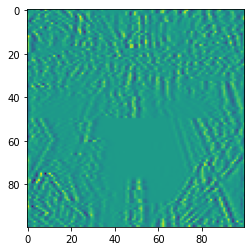

In [ ]:
plt.imshow(broken_image.view(100,100)) 

In [ ]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [ ]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

In [ ]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [ ]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.08796501159668
Loss at 1000 = 1.1392771005630493
Loss at 2000 = 0.5317637324333191
Loss at 3000 = 0.36792460083961487
Loss at 4000 = 0.29188787937164307
Loss at 5000 = 0.24474751949310303
Loss at 6000 = 0.21035148203372955
Loss at 7000 = 0.18280194699764252
Loss at 8000 = 0.15939338505268097
Loss at 9000 = 0.1386779397726059
Loss at 10000 = 0.11980070918798447
Loss at 11000 = 0.1022244468331337
Loss at 12000 = 0.08559852838516235
Loss at 13000 = 0.06968698650598526
Loss at 14000 = 0.054326821118593216
Loss at 15000 = 0.03940422832965851
Loss at 16000 = 0.024839628487825394
Loss at 17000 = 0.021161310374736786
Loss at 18000 = 0.021166455000638962
Loss at 19000 = 0.02116743102669716


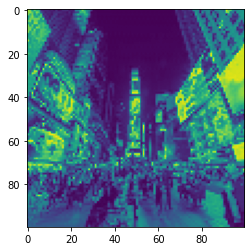

In [ ]:
plt.imshow(random_tensor.view(100,100).data)

## 2-3. 신경망 모델 구현하기

In [ ]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [ ]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

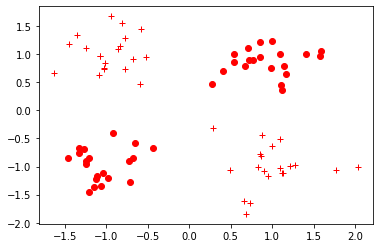

In [ ]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [ ]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [ ]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [ ]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6895025372505188


- 오차값이 0.73 이 나왔다. 
- 이정도의 오차를 가진 모델은 사실상 분류하는 능력이 없다고 봐도 무방하다.
---
- 신경망을 학습시켜 성능 향상 시키기

In [ ]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6980275511741638
Train loss at 100 is 0.6454440355300903
Train loss at 200 is 0.559746265411377
Train loss at 300 is 0.4361357092857361
Train loss at 400 is 0.3212893605232239
Train loss at 500 is 0.23008370399475098
Train loss at 600 is 0.16669759154319763
Train loss at 700 is 0.1249600201845169
Train loss at 800 is 0.09735219180583954
Train loss at 900 is 0.07849633693695068
Train loss at 1000 is 0.06511335074901581
Train loss at 1100 is 0.055264413356781006
Train loss at 1200 is 0.04778030142188072
Train loss at 1300 is 0.041942767798900604
Train loss at 1400 is 0.03729173541069031
Train loss at 1500 is 0.033515769988298416
Train loss at 1600 is 0.030391797423362732
Train loss at 1700 is 0.027769794687628746
Train loss at 1800 is 0.025541607290506363
Train loss at 1900 is 0.023626847192645073


In [ ]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.013874483294785023


- 학습을 하기 전과 비교했을때 현저하게 줄어든 오차값을 확인할 수 있다.
---
- 학습된 모델을 .pt 파일로 저장하기

In [ ]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-1.3046, -1.2628],
        [-0.4130, -0.1308],
        [-1.5958,  1.7051],
        [ 1.2735,  1.3564],
        [ 1.4721, -1.5684]])), ('linear_1.bias', tensor([-0.0234, -0.2447, -0.3513,  0.0616, -0.0419])), ('linear_2.weight', tensor([[-1.7885, -0.1584,  2.2192, -1.8547,  2.1012]])), ('linear_2.bias', tensor([-0.6132]))])


- `save()` 를 실행하고 나면 학습된 신경망의 가중치를 내포하는 model.pt 라는 파일이 생성된다. 
- 아래 코드처럼 새로운 신경망 객체에 model.pt 속의 가중치값을 입력시키는 것 또한 가능하다.

In [ ]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9964093565940857


# **3. DNN using PyTorch**
- DNN : Deep Neural Network
####<br>
- Reference의 예제 코드에서 내용 선정 및 발췌 후 정리 및 수정, 보완함
- Reference
  - 3분 딥러닝 파이토치맛

## 3-1. Fashion MNIST 데이터 셋 알아보기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/Lectures/data/'

### 3-1-1. Fashion MNIST 데이터 셋

In [ ]:
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)


Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw




Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
batch_size = 16

train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size
)

In [ ]:
dataiter       = iter(train_loader)
images, labels = next(dataiter)

### 3-1-2. 멀리서 살펴보기


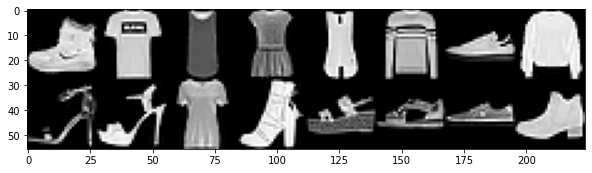

In [ ]:
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [ ]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [ ]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


### 3-1-3. 가까이서 살펴보기


(28, 28)


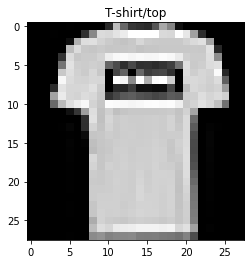

In [ ]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

## 3-2. 인공신경망으로 패션 아이템 분류하기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
EPOCHS = 30
BATCH_SIZE = 64

### 3-2-1. 데이터셋 불러오기

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

### 3-2-2. 신경망으로 Fashion MNIST 학습하기
- 입력 `x` 는 `[배치크기, 색, 높이, 넓이]`로 이루어짐
- `x.size()`는 [64, 1, 28, 28]
- Fashion MNIST에서 이미지의 크기는 28 x 28 (=784), 색은 흑백으로 1 가지
- 사용할 모델은 3개의 레이어를 가진 인공신경망
####<br>
- 모델 준비
  - `to()` 함수는 모델의 파라미터들을 지정한 곳으로 보내는 역할
  - 일반적으로 CPU 1개만 사용할 경우 필요는 없지만, GPU를 사용하고자 하는 경우 `to("cuda")`로 지정하여 GPU로 보내야 함
  - 지정하지 않을 경우 계속 CPU에 남아 있게 되며 빠른 훈련의 이점을 누리실 수 없음
  - 최적화 알고리즘(Optimizer)으로는 파이토치에 내장되어 있는 `optim.SGD`를 사용

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model        = Net().to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

- 학습

In [ ]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 학습 데이터를 DEVICE의 메모리로 보냄
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

- 테스트

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 모든 오차 더하기
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            
            # 가장 큰 값을 가진 클래스가 모델의 예측입니다.
            # 예측과 정답을 비교하여 일치할 경우 correct에 1을 더합니다.
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

- 실행

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.8291, Accuracy: 68.89%
[2] Test Loss: 0.6672, Accuracy: 75.08%
[3] Test Loss: 0.5825, Accuracy: 79.37%
[4] Test Loss: 0.5531, Accuracy: 79.90%
[5] Test Loss: 0.5061, Accuracy: 81.87%
[6] Test Loss: 0.4966, Accuracy: 82.11%
[7] Test Loss: 0.4943, Accuracy: 82.06%
[8] Test Loss: 0.4810, Accuracy: 83.25%
[9] Test Loss: 0.4570, Accuracy: 83.77%
[10] Test Loss: 0.4629, Accuracy: 83.39%
[11] Test Loss: 0.4575, Accuracy: 83.79%
[12] Test Loss: 0.4321, Accuracy: 84.81%
[13] Test Loss: 0.4333, Accuracy: 84.53%
[14] Test Loss: 0.4260, Accuracy: 84.89%
[15] Test Loss: 0.4392, Accuracy: 84.38%
[16] Test Loss: 0.4219, Accuracy: 84.94%
[17] Test Loss: 0.4083, Accuracy: 85.47%
[18] Test Loss: 0.4062, Accuracy: 85.70%
[19] Test Loss: 0.4142, Accuracy: 85.15%
[20] Test Loss: 0.4051, Accuracy: 85.64%
[21] Test Loss: 0.4271, Accuracy: 84.85%
[22] Test Loss: 0.3898, Accuracy: 86.22%
[23] Test Loss: 0.3885, Accuracy: 86.24%
[24] Test Loss: 0.4001, Accuracy: 85.50%
[25] Test Loss: 0.3845, A

## 3-3. 과적합과 정규화
- Overfitting and Regularization

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64

### 3-3-1. 데이터셋에 노이즈 추가

original.png

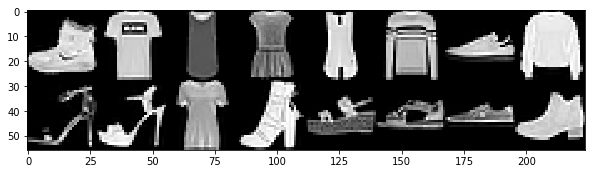

horizontalflip.png

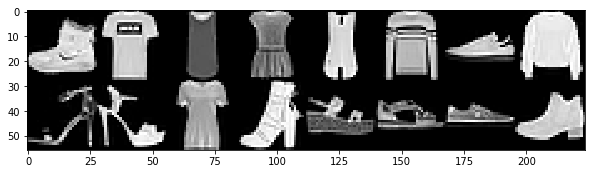

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

## 3-3-2. 신경망으로 Fashion MNIST 학습
- 입력 `x` 는 `[배치크기, 색, 높이, 넓이]`로 이루어져 있습니다.
- `x.size()`를 해보면 `[64, 1, 28, 28]`이라고 표시되는 것을 보실 수 있습니다.
- Fashion MNIST에서 이미지의 크기는 28 x 28, 색은 흑백으로 1 가지 입니다.
- 그러므로 입력 x의 총 특성값 갯수는 28 x 28 x 1, 즉 784개 입니다.
- 우리가 사용할 모델은 3개의 레이어를 가진 뉴럴네트워크 입니다. 

In [ ]:
class Net(nn.Module):
    def __init__(self, dropout_p=0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        # 드롭아웃 확률
        self.dropout_p = dropout_p

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        # 드롭아웃 추가
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = F.relu(self.fc2(x))
        # 드롭아웃 추가
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = self.fc3(x)
        return x

- 모델 준비
  - `to()` 함수는 모델의 파라미터들을 지정한 곳으로 보내는 역할을 합니다.
  - 일반적으로 CPU 1개만 사용할 경우 필요는 없지만,
  - GPU를 사용하고자 하는 경우 `to("cuda")`로 지정하여 GPU로 보내야 합니다.
  - 지정하지 않을 경우 계속 CPU에 남아 있게 되며 빠른 훈련의 이점을 누리실 수 없습니다.
  - 최적화 알고리즘으로 파이토치에 내장되어 있는 `optim.SGD`를 사용하겠습니다.

In [ ]:
model        = Net(dropout_p=0.2).to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

- 학습

In [ ]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

- 테스트


In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            
            # 맞춘 갯수 계산
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

- 실행

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.6283, Accuracy: 78.10%
[2] Test Loss: 0.5306, Accuracy: 81.17%
[3] Test Loss: 0.4841, Accuracy: 82.58%
[4] Test Loss: 0.4615, Accuracy: 83.43%
[5] Test Loss: 0.4400, Accuracy: 84.07%
[6] Test Loss: 0.4249, Accuracy: 84.63%
[7] Test Loss: 0.4190, Accuracy: 84.58%
[8] Test Loss: 0.4059, Accuracy: 85.26%
[9] Test Loss: 0.3954, Accuracy: 85.54%
[10] Test Loss: 0.3856, Accuracy: 85.81%
[11] Test Loss: 0.3825, Accuracy: 86.30%
[12] Test Loss: 0.3780, Accuracy: 86.21%
[13] Test Loss: 0.3816, Accuracy: 85.91%
[14] Test Loss: 0.3656, Accuracy: 86.60%
[15] Test Loss: 0.3607, Accuracy: 86.94%
[16] Test Loss: 0.3572, Accuracy: 87.03%
[17] Test Loss: 0.3606, Accuracy: 86.90%
[18] Test Loss: 0.3513, Accuracy: 87.30%
[19] Test Loss: 0.3516, Accuracy: 87.20%
[20] Test Loss: 0.3595, Accuracy: 86.54%
[21] Test Loss: 0.3449, Accuracy: 87.47%
[22] Test Loss: 0.3404, Accuracy: 87.50%
[23] Test Loss: 0.3452, Accuracy: 87.18%
[24] Test Loss: 0.3338, Accuracy: 87.90%
[25] Test Loss: 0.3321, A

# **4. CNN using PyTorch**
- Convolutional Neural Network (CNN) 을 이용하여 패션아이템 구분 성능을 높여보자.
####<br>
- Reference의 예제 코드에서 내용 선정 및 발췌 후 정리 및 수정, 보완함
- Reference
  - 3분 딥러닝 파이토치맛

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
EPOCHS     = 40
BATCH_SIZE = 64

- 데이터셋 불러오기

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./.data',
                   train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./.data/MNIST/raw/train-images-idx3-ubyte.gz to ./.data/MNIST/raw




Extracting ./.data/MNIST/raw/train-labels-idx1-ubyte.gz to ./.data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./.data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./.data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## 4-1. 신경망으로 Fashion MNIST 학습하기

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

- 하이퍼파라미터 

  - `to()` 함수는 모델의 파라미터들을 지정한 곳으로 보내는 역할
  - 일반적으로 CPU 1개만 사용할 경우 필요는 없지만, GPU를 사용하고자 하는 경우 `to("cuda")`로 지정하여 GPU로 보내야 함.
  - 지정하지 않을 경우 계속 CPU에 남아 있게 되며 빠른 훈련의 이점을 누릴 수 없음
  - 최적화 알고리즘으로 파이토치에 내장되어 있는 `optim.SGD` 사용

In [ ]:
model     = Net().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

- 학습하기

In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

- 테스트하기

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

- 실행

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.352177
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.139300
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.607922
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.389121
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.390126
[1] Test Loss: 0.1953, Accuracy: 94.10%
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.287881
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.287467
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.488902
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.383720
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.248966
[2] Test Loss: 0.1276, Accuracy: 95.75%
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.251095
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.262831
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.206531
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.301374
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.253666
[3] Test Loss: 0.1017, Accuracy: 96.59%
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.244843
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.206136
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.212039


## 4-2. 신경망 깊게 쌓아 컬러 데이터셋에 적용하기
- Convolutional Neural Network (CNN) 을 쌓아올려 딥한 러닝을 해보자.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets, models

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

- 하이퍼파라미터 

In [ ]:
EPOCHS     = 300
BATCH_SIZE = 128

- 데이터셋 불러오기

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.RandomCrop(32, padding=4),
                       transforms.RandomHorizontalFlip(),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))])),
    batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./.data',
                   train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5),
                                            (0.5, 0.5, 0.5))])),
    batch_size=BATCH_SIZE, shuffle=True)


Extracting ./.data/cifar-10-python.tar.gz to ./.data


- ResNet 모델 만들기

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 2, stride=1)
        self.layer2 = self._make_layer(32, 2, stride=2)
        self.layer3 = self._make_layer(64, 2, stride=2)
        self.linear = nn.Linear(64, num_classes)

    def _make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

- 준비

In [ ]:
model = ResNet().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.1,
                      momentum=0.9, weight_decay=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

- 학습

In [ ]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

- 테스트

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

- 실행

In [ ]:
for epoch in range(1, EPOCHS + 1):
    scheduler.step()
    train(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


[1] Test Loss: 1.4546, Accuracy: 47.88%
[2] Test Loss: 1.1837, Accuracy: 59.09%
[3] Test Loss: 1.5452, Accuracy: 55.83%
[4] Test Loss: 0.9972, Accuracy: 66.70%
[5] Test Loss: 1.3173, Accuracy: 63.00%
[6] Test Loss: 0.7862, Accuracy: 74.06%
[7] Test Loss: 0.6879, Accuracy: 76.67%
[8] Test Loss: 1.0245, Accuracy: 66.95%
[9] Test Loss: 0.7929, Accuracy: 73.67%
[10] Test Loss: 0.9051, Accuracy: 70.49%
[11] Test Loss: 0.8542, Accuracy: 74.17%
[12] Test Loss: 0.7616, Accuracy: 75.62%
[13] Test Loss: 0.8873, Accuracy: 72.46%


KeyboardInterrupt: ignored

# **6. RNN using PyTorch**
- Reference의 예제 코드에서 내용 선정 및 발췌 후 정리 및 수정, 보완함
- Reference
  - 3분 딥러닝 파이토치맛

## 6-1. 영화 리뷰 감정 분석
- RNN 을 이용해 IMDB 데이터를 가지고 텍스트 감정분석을 해 보자.
####<br>
- 텍스트 형태의 데이터셋인 IMDB 데이터셋은 50,000건의 영화 리뷰로 이루어져 있음.
- 각 리뷰는 다수의 영어 문장들로 이루어져 있으며, 
- 평점이 7점 이상의 긍정적인 영화 리뷰는 2로, 평점이 4점 이하인 부정적인 영화 리뷰는 1로 레이블링 되어 있음.
- 영화 리뷰 텍스트를 RNN 에 입력시켜 영화평의 전체 내용을 압축하고, 이렇게 압축된 리뷰가 긍정적인지 부정적인지 판단해주는 간단한 분류 모델을 만드는 것이 이번 프로젝트의 목표

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
# from torchtext import datasets        # 현재 버전에서 사라짐 torchtext --> torchtext.legacy 로 변경할 것
from torchtext.legacy import data, datasets

In [ ]:
# 하이퍼파라미터
BATCH_SIZE = 64
lr = 0.001
EPOCHS = 10
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", DEVICE)

다음 기기로 학습합니다: cpu


In [ ]:
# 데이터 로딩하기
print("데이터 로딩중...")
TEXT = data.Field(sequential=True, batch_first=True, lower=True)
LABEL = data.Field(sequential=False, batch_first=True)
trainset, testset = datasets.IMDB.splits(TEXT, LABEL)
TEXT.build_vocab(trainset, min_freq=5)
LABEL.build_vocab(trainset)

# 학습용 데이터를 학습셋 80% 검증셋 20% 로 나누기
trainset, valset = trainset.split(split_ratio=0.8)
train_iter, val_iter, test_iter = data.BucketIterator.splits(
        (trainset, valset, testset), batch_size=BATCH_SIZE,
        shuffle=True, repeat=False)


vocab_size = len(TEXT.vocab)
n_classes = 2

aclImdb_v1.tar.gz:   1%|          | 524k/84.1M [00:00<00:16, 5.01MB/s]

데이터 로딩중...
downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:01<00:00, 55.1MB/s]


In [ ]:
print("[학습셋]: %d [검증셋]: %d [테스트셋]: %d [단어수]: %d [클래스] %d"
      % (len(trainset),len(valset), len(testset), vocab_size, n_classes))

[학습셋]: 20000 [검증셋]: 5000 [테스트셋]: 25000 [단어수]: 46159 [클래스] 2


In [ ]:
class BasicGRU(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(BasicGRU, self).__init__()
        print("Building Basic GRU model...")
        self.n_layers = n_layers
        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(dropout_p)
        self.gru = nn.GRU(embed_dim, self.hidden_dim,
                          num_layers=self.n_layers,
                          batch_first=True)
        self.out = nn.Linear(self.hidden_dim, n_classes)

    def forward(self, x):
        x = self.embed(x)
        h_0 = self._init_state(batch_size=x.size(0))
        x, _ = self.gru(x, h_0)  # [i, b, h]
        h_t = x[:,-1,:]
        self.dropout(h_t)
        logit = self.out(h_t)  # [b, h] -> [b, o]
        return logit
    
    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()


In [ ]:
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        y.data.sub_(1)  # 레이블 값을 0과 1로 변환
        optimizer.zero_grad()

        logit = model(x)
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()

In [ ]:
def evaluate(model, val_iter):
    """evaluate model"""
    model.eval()
    corrects, total_loss = 0, 0
    for batch in val_iter:
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        y.data.sub_(1) # 레이블 값을 0과 1로 변환
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction='sum')
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
    size = len(val_iter.dataset)
    avg_loss = total_loss / size
    avg_accuracy = 100.0 * corrects / size
    return avg_loss, avg_accuracy

In [ ]:
model = BasicGRU(1, 256, vocab_size, 128, n_classes, 0.5).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Building Basic GRU model...


In [ ]:
best_val_loss = None
for e in range(1, EPOCHS+1):
    train(model, optimizer, train_iter)
    val_loss, val_accuracy = evaluate(model, val_iter)

    print("[이폭: %d] 검증 오차:%5.2f | 검증 정확도:%5.2f" % (e, val_loss, val_accuracy))
    
    # 검증 오차가 가장 적은 최적의 모델을 저장
    if not best_val_loss or val_loss < best_val_loss:
        if not os.path.isdir("snapshot"):
            os.makedirs("snapshot")
        torch.save(model.state_dict(), './snapshot/txtclassification.pt')
        best_val_loss = val_loss

KeyboardInterrupt: ignored

In [ ]:
model.load_state_dict(torch.load('./snapshot/txtclassification.pt'))
test_loss, test_acc = evaluate(model, test_iter)
print('테스트 오차: %5.2f | 테스트 정확도: %5.2f' % (test_loss, test_acc))

테스트 오차:  0.31 | 테스트 정확도: 86.00


## 6-2. Seq2Seq 기계 번역
- 단순화 된 Seq2Seq 모델 사용
- 한 언어로 된 문장을 다른 언어로 된 문장으로 번역하는 덩치가 큰 모델이 아닌 
- 영어 알파벳 문자열("hello")을 스페인어 알파벳 문자열("hola")로 번역하는 Mini Seq2Seq 모델 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt

In [ ]:
vocab_size = 256  # 총 아스키 코드 개수
x_ = list(map(ord, "hello"))  # 아스키 코드 리스트로 변환
y_ = list(map(ord, "hola"))   # 아스키 코드 리스트로 변환
print("hello -> ", x_)
print("hola  -> ", y_)

hello ->  [104, 101, 108, 108, 111]
hola  ->  [104, 111, 108, 97]


In [ ]:
x = torch.LongTensor(x_)
y = torch.LongTensor(y_)

In [ ]:
class Seq2Seq(nn.Module):
    def __init__(self, vocab_size, hidden_size):
        super(Seq2Seq, self).__init__()
        self.n_layers = 1
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.encoder = nn.GRU(hidden_size, hidden_size)
        self.decoder = nn.GRU(hidden_size, hidden_size)
        self.project = nn.Linear(hidden_size, vocab_size)

    def forward(self, inputs, targets):
        # 인코더에 들어갈 입력
        initial_state = self._init_state()
        embedding = self.embedding(inputs).unsqueeze(1)
        # embedding = [seq_len, batch_size, embedding_size]
        
        # 인코더 (Encoder)
        encoder_output, encoder_state = self.encoder(embedding, initial_state)
        # encoder_output = [seq_len, batch_size, hidden_size]
        # encoder_state  = [n_layers, seq_len, hidden_size]

        # 디코더에 들어갈 입력
        decoder_state = encoder_state
        decoder_input = torch.LongTensor([0])
        
        # 디코더 (Decoder)
        outputs = []
        
        for i in range(targets.size()[0]):
            decoder_input = self.embedding(decoder_input).unsqueeze(1)
            decoder_output, decoder_state = self.decoder(decoder_input, decoder_state)
            projection = self.project(decoder_output)
            outputs.append(projection)
            
            #티처 포싱(Teacher Forcing) 사용
            decoder_input = torch.LongTensor([targets[i]])

        outputs = torch.stack(outputs).squeeze()
        return outputs
    
    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_size).zero_()

In [ ]:
seq2seq = Seq2Seq(vocab_size, 16)

Seq2Seq(
  (embedding): Embedding(256, 16)
  (encoder): GRU(16, 16)
  (decoder): GRU(16, 16)
  (project): Linear(in_features=16, out_features=256, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(seq2seq.parameters(), lr=1e-3)

In [ ]:
log = []
for i in range(1000):
    prediction = seq2seq(x, y)
    loss = criterion(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_val = loss.data
    log.append(loss_val)
    if i % 100 == 0:
        print("\n 반복:%d 오차: %s" % (i, loss_val.item()))
        _, top1 = prediction.data.topk(1, 1)
        print([chr(c) for c in top1.squeeze().numpy().tolist()])


 반복:0 오차: 5.596976280212402
['9', 'L', '\x98', 'L']

 반복:100 오차: 2.069061756134033
['h', 'o', 'l', 'a']

 반복:200 오차: 0.4633035957813263
['h', 'o', 'l', 'a']

 반복:300 오차: 0.19558477401733398
['h', 'o', 'l', 'a']

 반복:400 오차: 0.11498594284057617
['h', 'o', 'l', 'a']

 반복:500 오차: 0.07863441854715347
['h', 'o', 'l', 'a']

 반복:600 오차: 0.058321841061115265
['h', 'o', 'l', 'a']

 반복:700 오차: 0.04549476131796837
['h', 'o', 'l', 'a']

 반복:800 오차: 0.03673341125249863
['h', 'o', 'l', 'a']

 반복:900 오차: 0.030412672087550163
['h', 'o', 'l', 'a']


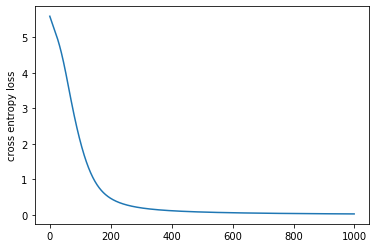

In [ ]:
plt.plot(log)
plt.ylabel('cross entropy loss')
plt.show()